## Loading Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.loadtxt('lr_data.csv', delimiter = ',')

In [3]:
X = data[:, :-1]
y = data[:, -1]

## EDA

Text(0,0.5,'y')

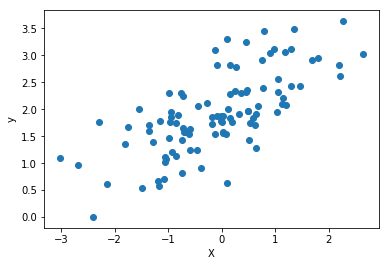

In [4]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

## Modeling

In [5]:
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements Gradient Descent Step for Squared Error function
    
    Parameters:
    X : array of predictor features
    y : array of target outputs
    W : coefficients of predictor features
    b : intercept in the linear regression equation
    
    Returns:
    W_new : updated value of predictor features coefficients
    b_new : updated value of the intercept
    """
    
    # predictions
    y_hat = np.matmul(X, W) + b
    
    # computing errors
    error = y - y_hat
    
    # updating coefficients and intercept
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new

In [6]:
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter=25):
    """
    This function performs mini-batch gradient descent on a given dataset
    
    Parameters:
    X : array of predictor features
    y : array of target outputs
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used
    
    Returns:
    regression_coef : array of coefficients and intercepts generated by gradient descent algorithm
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1])
    b = 0 
    
    # iterations
    regression_coef = [np.hstack((W, b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch, :]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

## Prediction

In [7]:
regression_coef = miniBatchGD(X, y)

## Plotting Results

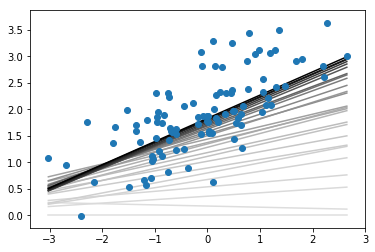

In [8]:
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max], [X_min * W + b, X_max * W + b], color=color)
plt.scatter(X, y, zorder=3)
plt.show()    